In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Reading and Understanding the Data**

In [3]:
train_titanic = pd.read_csv('/kaggle/input/titanic/train.csv')
train_titanic.shape

(891, 12)

In [4]:
train_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:
train_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
train_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# Check for missing value counts
train_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Skewness of Age: 0.3882898514698657


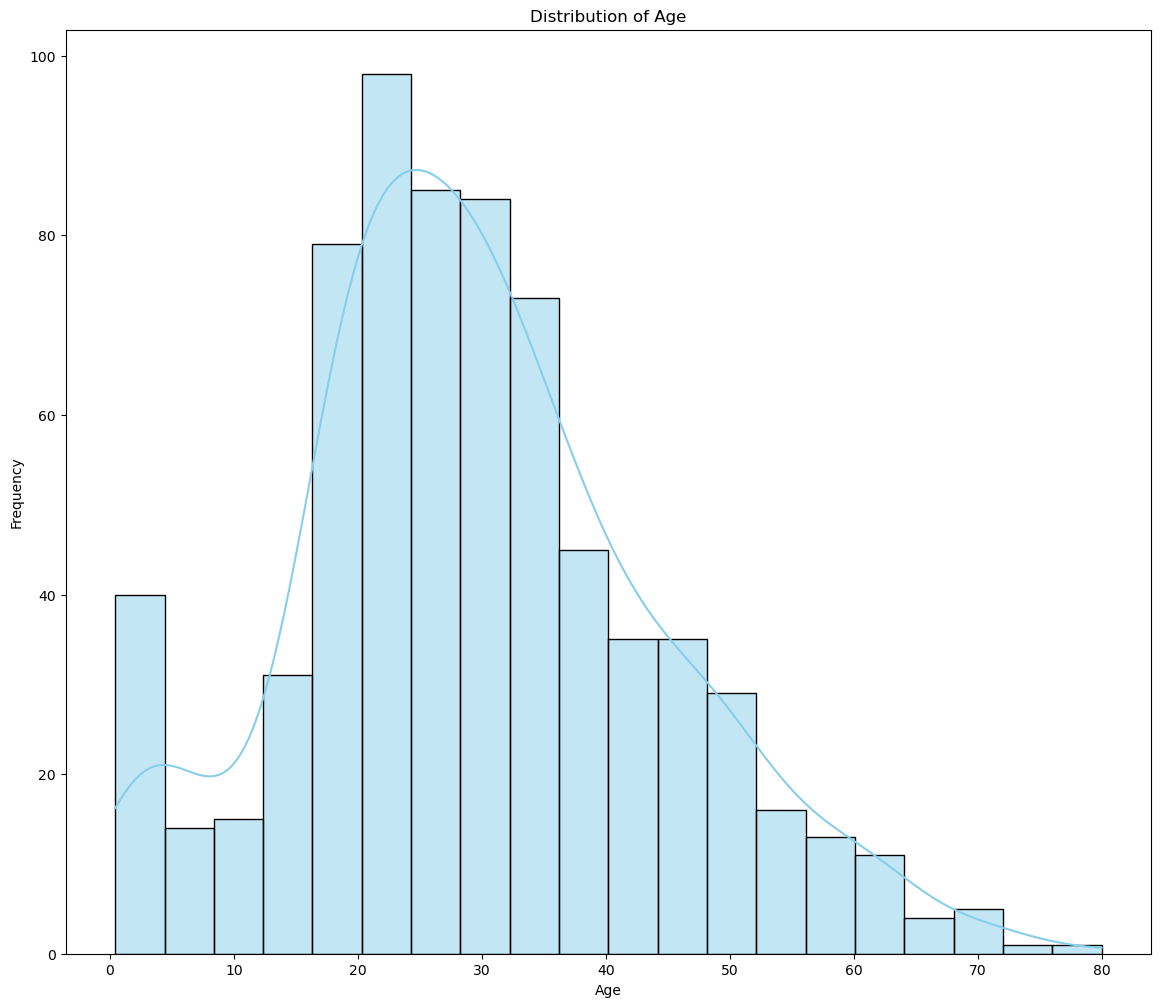

In [12]:
# I can see that I have missing value in the Age column
# get the skewness to determine whether to fill the missing value of a mean, median, mode or etc.
from scipy.stats import skew
# Distribution of Age
plt.figure(figsize=(14,12))
sns.histplot(train_titanic['Age'].dropna(), kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

skewness = skew(train_titanic['Age'].dropna())
print(f"Skewness of Age: {skewness}")

In [13]:
# Based on the skewness I am gonna use the median value of the Age column to fill the missing values
median_age = train_titanic['Age'].median()
train_titanic['Age'].fillna(median_age, inplace=True)

In [14]:
# Fill missing values in the Embarked column using mode imputation
train_titanic['Embarked'].fillna(train_titanic['Embarked'].mode()[0], inplace=True)

In [15]:
# Dropping unnecessary columns
train_titanic = train_titanic.drop(['PassengerId', 'Name', 'Cabin', 'Ticket', 'Fare'], axis=1)
train_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,28.0,1,2,S
889,1,1,male,26.0,0,0,C


# **Exploratory Data Analysis**

### Import data visualization packages

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

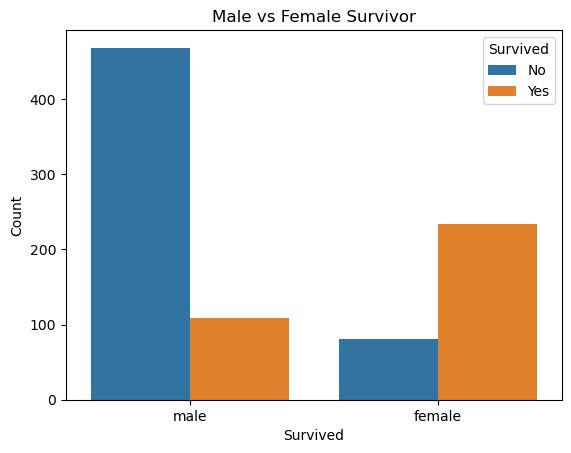

In [17]:
# Male and Female survivor
sns.countplot(x='Sex', data=train_titanic, hue='Survived')
plt.title('Male vs Female Survivor')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

As shown in the graph, majority of **Male** did not survived the titanic.

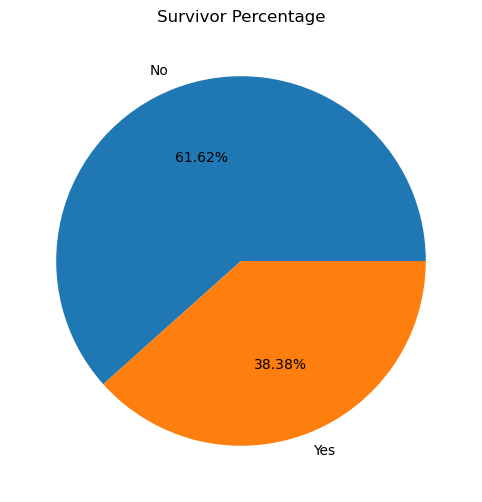

In [18]:
# Pie chart for the percentage of Male and Female survivor
plt.figure(figsize=(10, 6))
plt.pie(train_titanic['Survived'].value_counts(),labels=['No', 'Yes'], autopct='%1.2f%%')
plt.title('Survivor Percentage')
plt.show()

The percentage of the survivor in the dataset are only 38.38%.

## **Age Count**

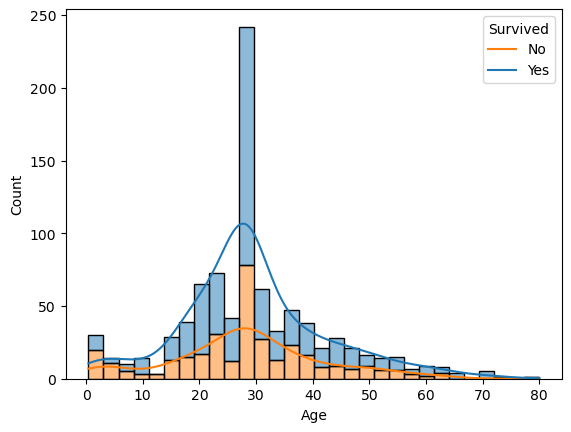

In [19]:
# Survivor count based on Age
sns.histplot(data=train_titanic, x='Age', hue='Survived', multiple='stack', kde=True)
plt.legend(title='Survived', labels=['No', 'Yes'])


The majority of the people that did not survived are from age group 25-30 years old.

## **Port of Embarkation**

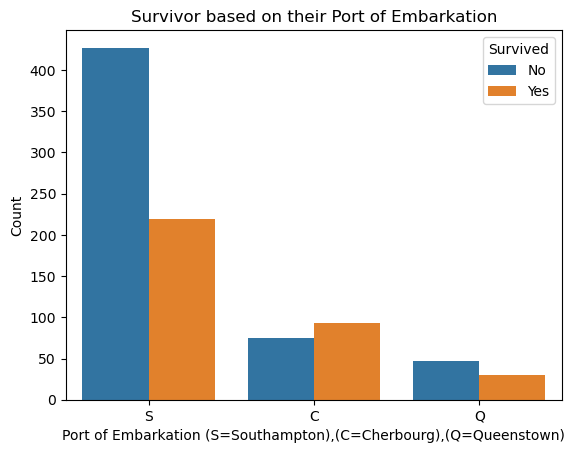

In [20]:
sns.countplot(x='Embarked', hue='Survived', data=train_titanic)
plt.title('Survivor based on their Port of Embarkation')
plt.xlabel('Port of Embarkation (S=Southampton),(C=Cherbourg),(Q=Queenstown)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

This graph shows the number of people who did not survived based on their port of embarkation. Majority of people who did not survived and who survived are from **S=>Southampton** port, followed by **C=>Cherbourg** and **Q=>Queenstown**.

## **Ticket class**

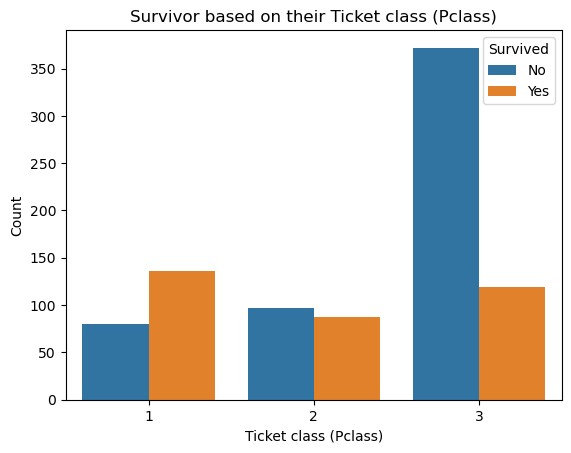

In [21]:
sns.countplot(x='Pclass', hue='Survived', data=train_titanic)
plt.title('Survivor based on their Ticket class (Pclass)')
plt.xlabel('Ticket class (Pclass)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

This graph shows the number of people who did not survived based on the ticket class **(Pclass)**. Majority of people who did not survived are from **3rd class** followed by **2nd class** and **1st class**. In contrast, majority of people who survived are from **1st class**, followed by **3rd class** and **2nd class**. 

## **Sibsp** and **Parch**

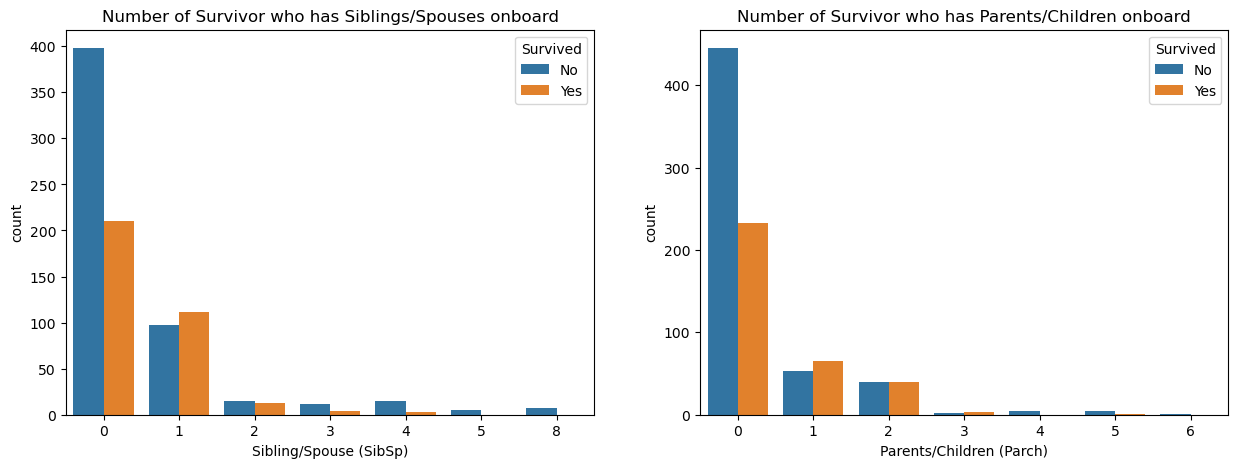

In [22]:

fig, ax= plt.subplots(1,2,figsize=(15, 5))
sns.countplot(x='SibSp', hue='Survived', data=train_titanic, ax=ax[0])
ax[0].set_title('Number of Survivor who has Siblings/Spouses onboard')
ax[0].set_xlabel('Sibling/Spouse (SibSp)')
ax[0].legend(title='Survived', labels=['No', 'Yes'])


sns.countplot(x='Parch', hue='Survived', data=train_titanic, ax=ax[1])
ax[1].set_title('Number of Survivor who has Parents/Children onboard')
ax[1].set_xlabel('Parents/Children (Parch)')
ax[1].legend(title='Survived', labels=['No', 'Yes'])

plt.show()

The graph shows the number of survivor who have **Sibling/Spouse** and **Parents/Children** aboard the titanic. Majority of people who did not survived the titanic don't have **Sibling/Spouse** and **Parents/Children** aboard the titanic.

# **Data Preprocessing Part 2**

In [23]:
train_titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
5,0,3,male,28.0,0,0,Q
6,0,1,male,54.0,0,0,S
7,0,3,male,2.0,3,1,S
8,1,3,female,27.0,0,2,S
9,1,2,female,14.0,1,0,C


Since there are two categorical values in my final dataframe,
I will use LabelEncoder on the **Sex** column and **Embarked** column

In [24]:
#  Male => 1, female => 0
#  S => 2, C => 0, Q => 1
from sklearn.preprocessing import LabelEncoder

var = ['Sex', 'Embarked']
le = LabelEncoder()
for i in var:
    le.fit(train_titanic[i].unique())
    train_titanic[i] = le.transform(train_titanic[i])
    print(i, train_titanic[i].unique())

Sex [1 0]
Embarked [2 0 1]


In [25]:
train_titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2
5,0,3,1,28.0,0,0,1
6,0,1,1,54.0,0,0,2
7,0,3,1,2.0,3,1,2
8,1,3,0,27.0,0,2,2
9,1,2,0,14.0,1,0,0


# **Scaling**

 For scaling, I will use **`Age`**. I will use **`StandardScaler`** to scale these features, which will transform them to have a mean of 0 and a standard deviation of 1.

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_titanic[['Age']] = scaler.fit_transform(train_titanic[['Age']])
train_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,-0.565736,1,0,2
1,1,1,0,0.663861,1,0,0
2,1,3,0,-0.258337,0,0,2
3,1,1,0,0.433312,1,0,2
4,0,3,1,0.433312,0,0,2
...,...,...,...,...,...,...,...
886,0,2,1,-0.181487,0,0,2
887,1,1,0,-0.796286,0,0,2
888,0,3,0,-0.104637,1,2,2
889,1,1,1,-0.258337,0,0,0


# Checking Correlation Matrix

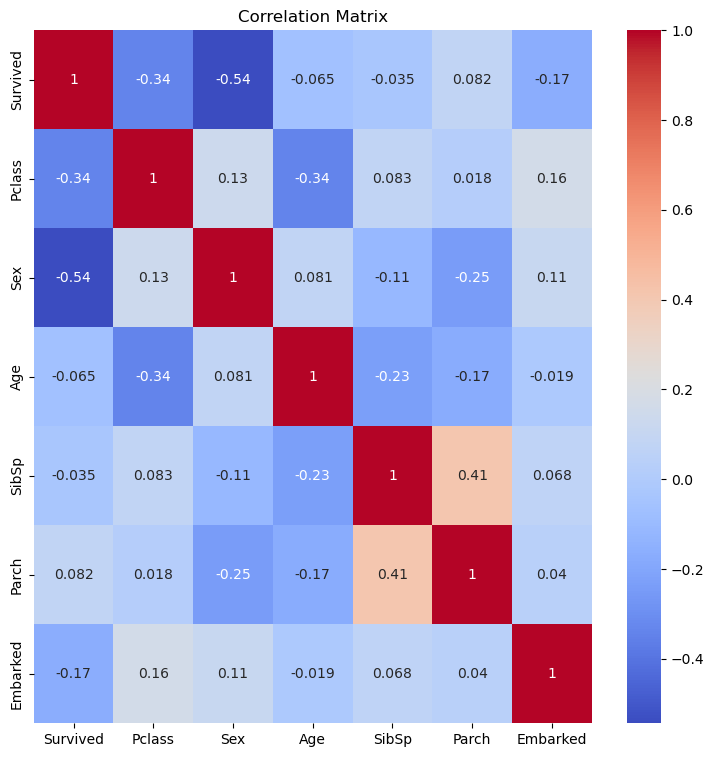

In [27]:
plt.figure(figsize=(9, 9))
sns.heatmap(train_titanic.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Train Test Split**

In [28]:
#Assign features and target
X = train_titanic.drop(['Survived'], axis=1)
y = train_titanic.Survived
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# **Using LogisticRegression**

In [29]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg

LogisticRegression()

In [30]:
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

0.797752808988764

In [31]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Embarked
830,3,0,-1.103685,1,0,0
661,3,1,0.817561,0,0,0
59,3,1,-1.411085,5,2,2
44,3,0,-0.796286,0,0,1
498,1,0,-0.335187,1,2,2
...,...,...,...,...,...,...
7,3,1,-2.102733,3,1,2
351,1,1,-0.104637,0,0,2
216,3,0,-0.181487,0,0,2
579,3,1,0.202762,0,0,2


In [32]:
logreg_pred = logreg.predict(X_test)

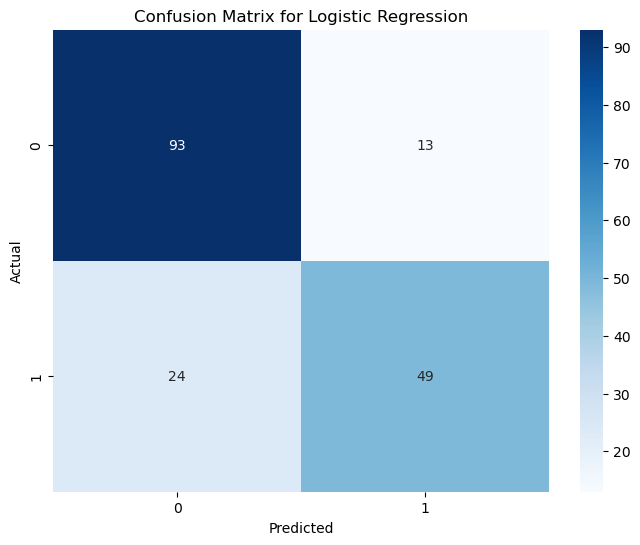

In [33]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, logreg_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       106
           1       0.79      0.67      0.73        73

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



In [35]:
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score

print("Accuracy Score; ", accuracy_score(y_test, logreg_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, logreg_pred))
print("R2 Score: ", r2_score(y_test, logreg_pred))

Accuracy Score;  0.7932960893854749
Mean Absolute Error:  0.20670391061452514
R2 Score:  0.14409408115792177


# **Using Decision Tree**

In [36]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
tree_model.score(X_train, y_train)

0.9452247191011236

In [38]:
tree_pred = tree_model.predict(X_test)

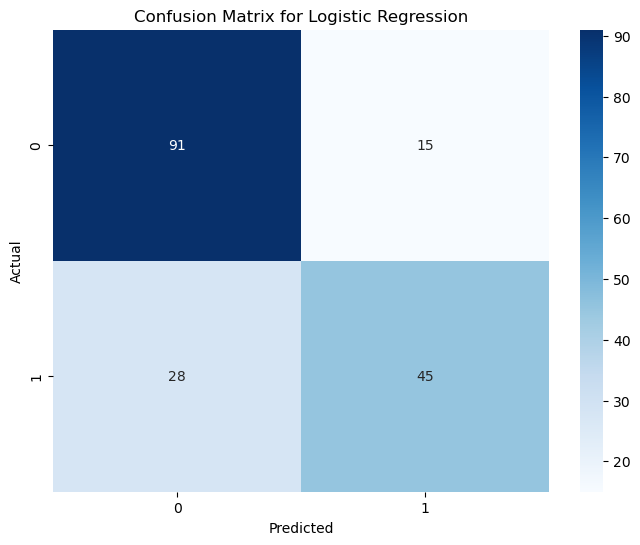

In [39]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, tree_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [40]:
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score

print("Accuracy Score; ", accuracy_score(y_test, tree_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, tree_pred))
print("R2 Score: ", r2_score(y_test, tree_pred))

Accuracy Score;  0.7597765363128491
Mean Absolute Error:  0.24022346368715083
R2 Score:  0.005298526751098209


# **Predition using the test.csv data**
# **I will use DecisionTree model since it has a good model accuracy**

In [41]:
test_titanic = pd.read_csv('/kaggle/input/titanic/test.csv')
test_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
test_titanic.shape

(418, 11)

In [43]:
from sklearn.preprocessing import LabelEncoder

var = ['Sex', 'Embarked']
le = LabelEncoder()
for i in var:
    le.fit(test_titanic[i].unique())
    test_titanic[i] = le.transform(test_titanic[i])
    print(i, test_titanic[i].unique())

Sex [1 0]
Embarked [1 2 0]


In [44]:
test_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2


In [45]:
test_x = test_titanic.drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin'], axis=1)

In [46]:
# Fill missing values in Age column of test.csv
median_age = test_x['Age'].median()
test_x['Age'].fillna(median_age, inplace=True)

In [47]:
predictions = tree_model.predict(test_x)

In [48]:
output= pd.DataFrame({'PassengerId':test_titanic.PassengerId,'Survived':predictions})
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [49]:
output.to_csv('Titanic_Competition_LogReg_JaylordVhan_Fabor.csv', index=False)